In [1]:
import io
import cv2
from matplotlib_scalebar.scalebar import ScaleBar
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.offsetbox
from matplotlib.lines import Line2D 
import numpy as np 
class AnchoredHScaleBar(matplotlib.offsetbox.AnchoredOffsetbox):
# """ size: length of bar in data units
#     extent : height of bar ends in axes units """
    def __init__(self, size=1, extent = 0.03, label="", loc=2, ax=None,
                 pad=0.4, borderpad=0.5, ppad = 0, sep=2, prop=None, 
                 frameon=True, linekw={}, **kwargs):
        if not ax:
            ax = plt.gca()
        trans = ax.get_yaxis_transform()
        size_bar = matplotlib.offsetbox.AuxTransformBox(trans)
        line = Line2D([0,0],[size,0], **linekw)
        hline1 = Line2D([-extent/2.,extent/2.],[0,0], **linekw)
        hline2 = Line2D([-extent/2.,extent/2.],[size,size], **linekw)
        size_bar.add_artist(line)
        size_bar.add_artist(hline1)
        size_bar.add_artist(hline2)


        txt = matplotlib.offsetbox.TextArea(label,textprops=dict(color="yellow",size=15, ha='left',va='baseline'))#, minimumdescent=False)
        self.vpac = matplotlib.offsetbox.VPacker(children=[size_bar,txt],  
                                 align="right", pad=ppad, sep=sep) 
        matplotlib.offsetbox.AnchoredOffsetbox.__init__(self, loc, pad=pad, 
                 borderpad=borderpad, child=self.vpac, prop=prop, frameon=frameon,
                 **kwargs) 
def get_scaled(scan,size,sp):
    fig= plt.figure(figsize=size)
    plt.imshow(scan,'gray')
    limit= int(np.round(200/(sp*1000)))
    xmarks= [i for i in range(0,scan.shape[1],limit)]
    ymarks= [i for i in range(0,scan.shape[0],limit)]
    ob = AnchoredHScaleBar(size=limit, label='200 um', loc=1, frameon=False,
                       pad=1,sep=4, linekw=dict(color="yellow"),)
    plt.yticks(ymarks)
    plt.xticks(xmarks)
    plt.tick_params(axis='both',direction= 'in' ,colors='yellow', length =10, width = 2, bottom=True, top=True, left=True, right=True,labelbottom = False, labelleft =False)
    plt.gca().add_artist(ob)
    buf = io.BytesIO()
    plt.savefig(buf, format="png", dpi=fig.get_dpi(), bbox_inches='tight')
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.close()
    return img

In [2]:
image= np.load(r"/home/usman/MServer/Projects/External/Hyundai_Motors/Gas-Acid_Layer_Physical_Properties_Prediction_Sub3/FRB/1-1/Outputs_aligned/f_mask.npy")

In [3]:
image.shape

(76, 500, 800, 3)

In [4]:
im= image[38]
img= get_scaled(im,(10,15),0.001995) #pass pixel spacing in mm

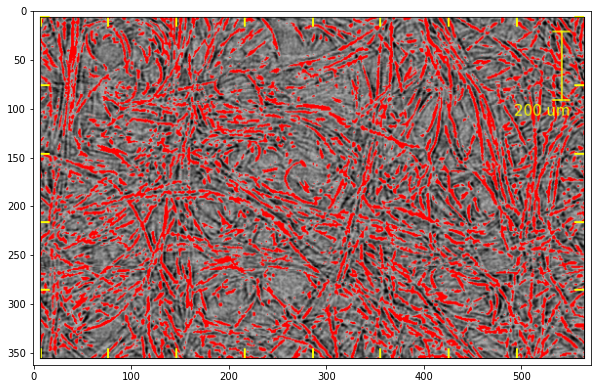

(363, 572, 3)


In [5]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()
print(img.shape)

In [6]:
def read_fiber(i):
    global fiber
    f_mask=fiber[i]  
    img= get_scaled(f_mask,(10,15),pixelspacing)
    img2 = Image.fromarray(np.uint8(img))
    tk_image2 = ImageTk.PhotoImage(img2 )
    return tk_image2

In [7]:
def read_scan(i):
    global scan
    res_s=scan_axial_new[i]  
    img= get_scaled(res_s,(10,15),pixelspacing)
    image= Image.fromarray(np.uint8( img))
    img1 =  ImageTk.PhotoImage(image=image)
    return img1